Problem 1

In [4]:
import sympy as sp

# Define symbolic variables
theta, lam, S = sp.symbols('theta lambda S', positive=True)
n = sp.symbols('n', integer=True, positive=True)

# 1. Maximum Likelihood Estimator (MLE)
theta_mle = n / S
print("MLE of θ (symbolic):")
sp.pprint(theta_mle)

# 2. Bayesian Estimator
# Define numerator and denominator of the expectation
numerator = sp.integrate(theta**(n + 1) * sp.exp(-theta * S), (theta, 0, lam))
denominator = sp.integrate(theta**n * sp.exp(-theta * S), (theta, 0, lam))
theta_bayes = numerator / denominator

print("\nBayesian Estimate of θ (symbolic):")
sp.pprint(theta_bayes.simplify())

MLE of θ (symbolic):
n
─
S

Bayesian Estimate of θ (symbolic):
 γ(n + 2, S⋅λ) 
───────────────
S⋅γ(n + 1, S⋅λ)


Problem 2

PCA transform vector (e): [0.70710678 0.70710678]
LDA transform vector (w): [ 14.06756757 -15.44594595]

Projected Data:
   X1  X2  Class  PCA Projection  LDA Projection
0   1   2      0        1.060660       -2.998193
1  -3  -1      0       -3.889087       -4.283508
2   4   5      0        5.303301       -3.533304
3  -1   1      0       -1.060660       -4.640248
4   0  -2      1       -2.474874        3.176564
5   5   2      1        3.889087        4.283508
6  -1  -4      1       -4.596194        5.353729
7   3   1      1        1.767767        2.641453


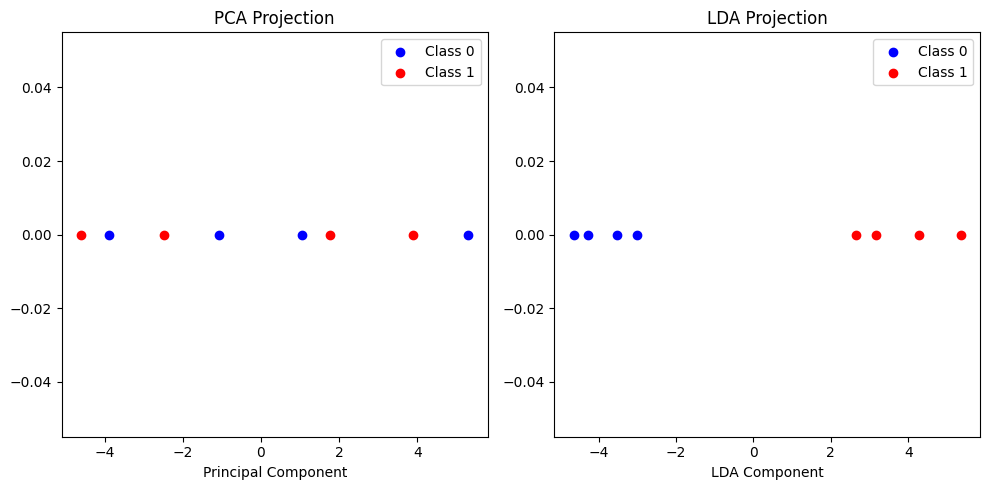

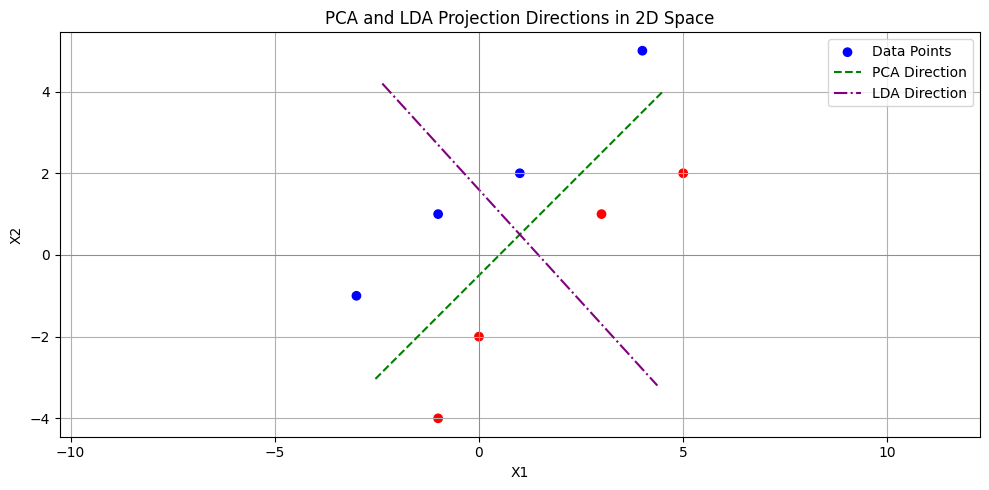

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd

# Step 1: Define datasets
D1 = np.array([[1, -3, 4, -1],
               [2, -1, 5,  1]])  # Class 0

D2 = np.array([[0, 5, -1, 3],
               [-2, 2, -4, 1]])  # Class 1

# Combine the samples into one dataset
X = np.hstack((D1, D2)).T  # Shape: (8, 2)
y = np.array([0]*D1.shape[1] + [1]*D2.shape[1])  # Labels: 0 for D1, 1 for D2


# Step 2: PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
pca_vector = pca.components_[0]

print("PCA transform vector (e):", pca_vector)

# Step 3: LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
lda_vector = lda.coef_[0]

print("LDA transform vector (w):", lda_vector)

# Step 4: Display results
results_df = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "Class": y,
    "PCA Projection": X_pca.flatten(),
    "LDA Projection": X_lda.flatten()
})

print("\nProjected Data:")
print(results_df)

# Optional: Visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("PCA Projection")
plt.scatter(X_pca[y == 0], np.zeros(4), label="Class 0", color='blue')
plt.scatter(X_pca[y == 1], np.zeros(4), label="Class 1", color='red')
plt.xlabel("Principal Component")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("LDA Projection")
plt.scatter(X_lda[y == 0], np.zeros(4), label="Class 0", color='blue')
plt.scatter(X_lda[y == 1], np.zeros(4), label="Class 1", color='red')
plt.xlabel("LDA Component")
plt.legend()

plt.tight_layout()
plt.show()

# Define the line parameter
mean = X.mean(axis=0)
t = np.linspace(-5, 5, 100)

# Compute PCA and LDA direction lines through the mean
pca_line = mean + np.outer(t, pca_vector)
lda_line = mean + np.outer(t, lda_vector / np.linalg.norm(lda_vector))  # normalize LDA direction

# Plot
plt.figure(figsize=(10, 5))
colors = ['blue' if label == 0 else 'red' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, label='Data Points')

plt.plot(pca_line[:, 0], pca_line[:, 1], label='PCA Direction', color='green', linestyle='--')
plt.plot(lda_line[:, 0], lda_line[:, 1], label='LDA Direction', color='purple', linestyle='-.')

plt.title("PCA and LDA Projection Directions in 2D Space")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()